In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from housing.config.configuration import HousingConfig

In [5]:
train_file_path="/config/workspace/housing/artifact/data_injection/2023_03_26_17_55_17/ingested_data/train/housing.csv"
test_file_path="/config/workspace/housing/artifact/data_injection/2023_03_26_17_55_17/ingested_data/test/housing.csv"
df_train=pd.read_csv(train_file_path)

In [30]:
target_col_name='median_house_value'

In [7]:
df_train_new=df_train.drop(columns=df_train.columns[0])

In [8]:
all_na_col=[ (col,df_train_new[col].isna().sum(),df_train_new[col].isna().sum()/len(df_train_new))  for col in df_train_new if df_train_new[col].isna().sum()>1 ]

In [9]:
all_na_col

[('total_bedrooms', 161, 0.009750484496124031)]

In [10]:
all_col_nuniques=[ (col,df_train_new[col].nunique()) for col in df_train_new.columns ]

In [11]:
all_col_nuniques

[('longitude', 819),
 ('latitude', 847),
 ('housing_median_age', 52),
 ('total_rooms', 5463),
 ('total_bedrooms', 1808),
 ('population', 3618),
 ('households', 1704),
 ('median_income', 10931),
 ('median_house_value', 3668),
 ('ocean_proximity', 5)]

In [12]:
n_col_thersold=25## assumption
dicreate_val_col=[ (col,df_train_new[col].nunique()) for col in df_train_new.columns if df_train_new[col].nunique()<=n_col_thersold]

In [13]:
dicreate_val_col

[('ocean_proximity', 5)]

# Data Visualaization

In [14]:
all_numeric_col=[col for col in df_train_new.columns if df_train_new[col].dtypes!='O' and 'C']

In [15]:
df_train_new.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.94,34.06,32.0,3418.0,662.0,2003.0,622.0,4.0333,210200.0,<1H OCEAN


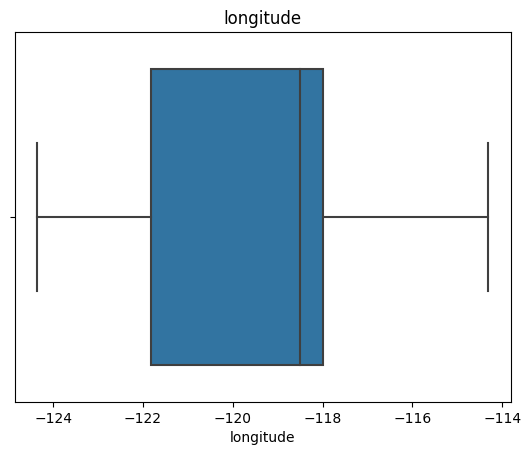

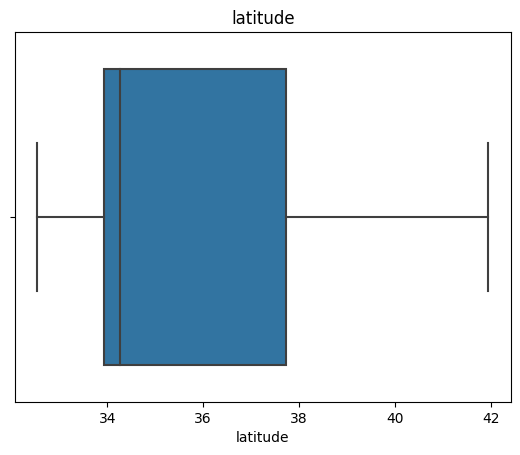

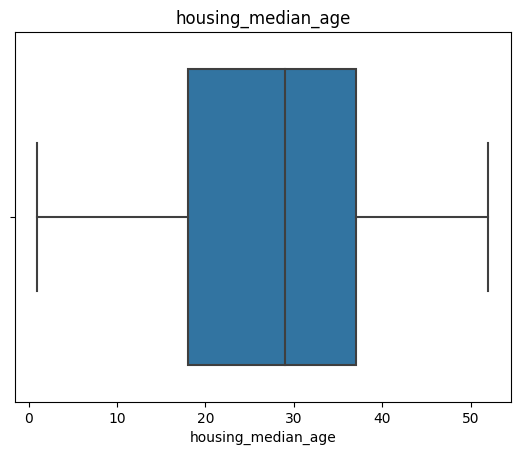

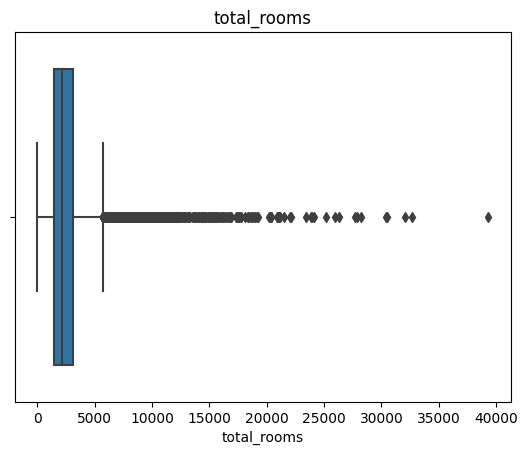

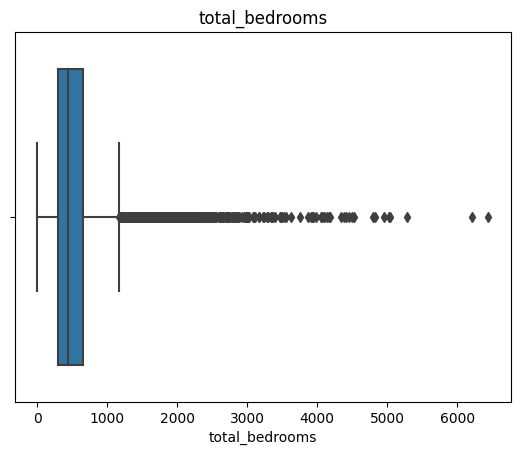

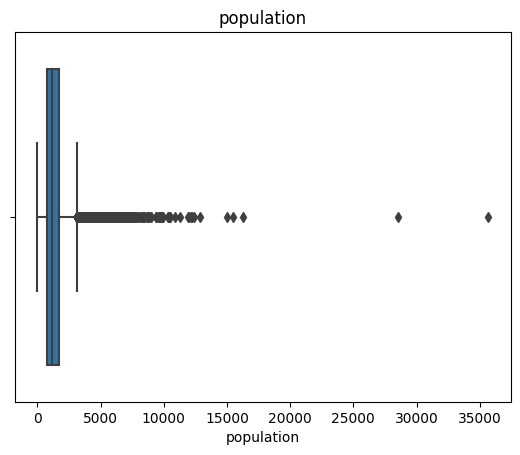

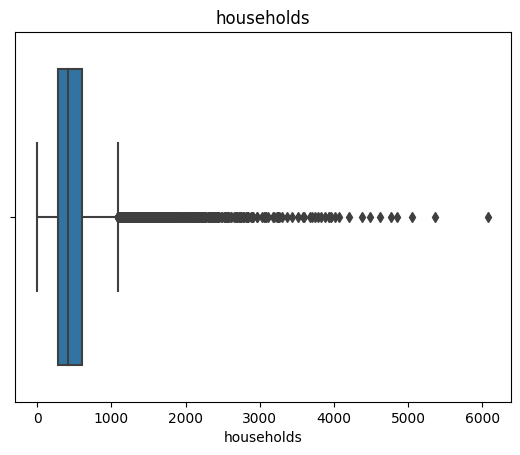

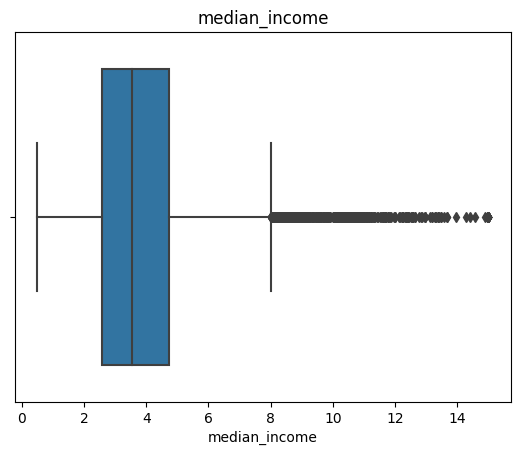

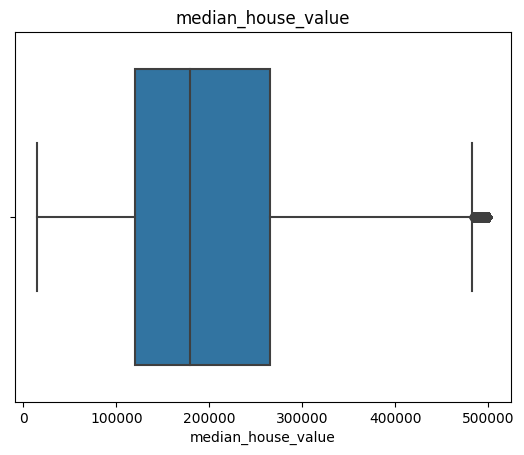

In [16]:
## find the outliers using boxplot
for col in all_numeric_col:
    plt.title(col)
    sns.boxplot(x=df_train_new[col])
    plt.show()
    print('===='*20)

## conclusion

columns to present lot of outliers

1 median house value

2.mdeian income

3.housholds

4.total bedrooms

4.total rooms

5.total rooms


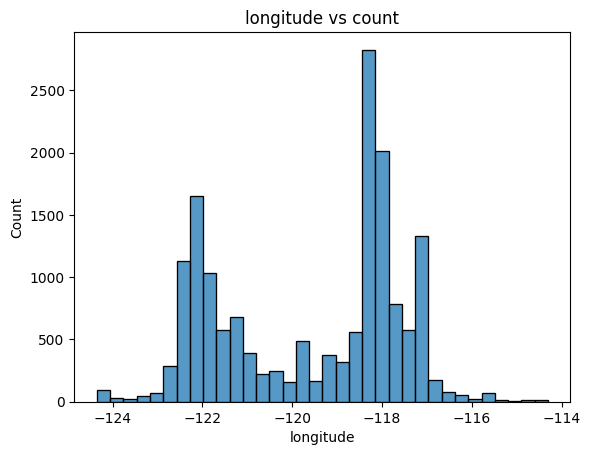

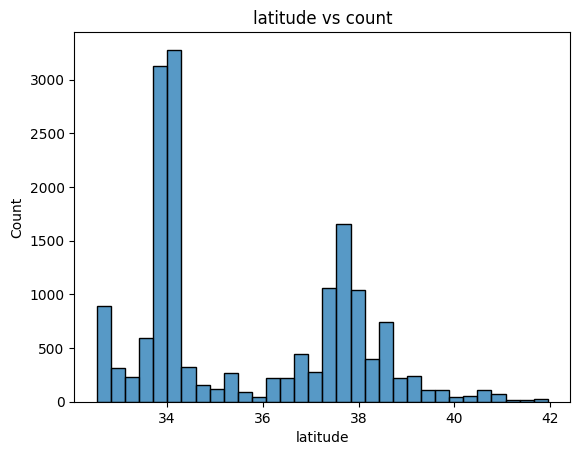

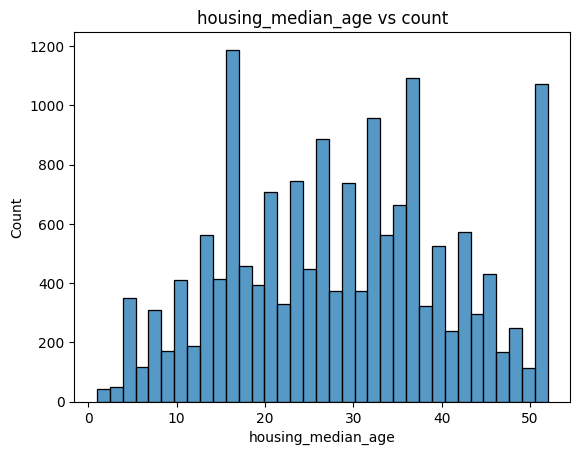

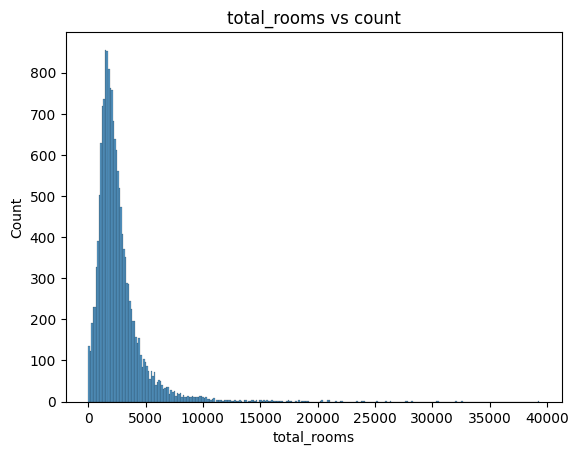

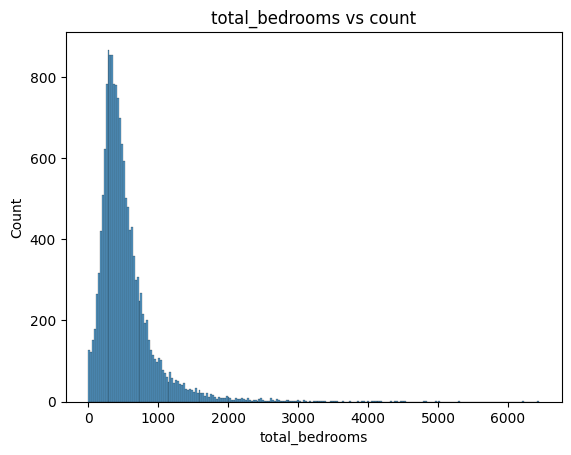

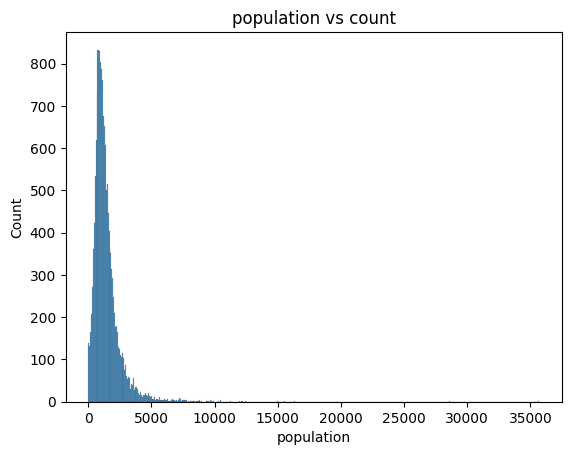

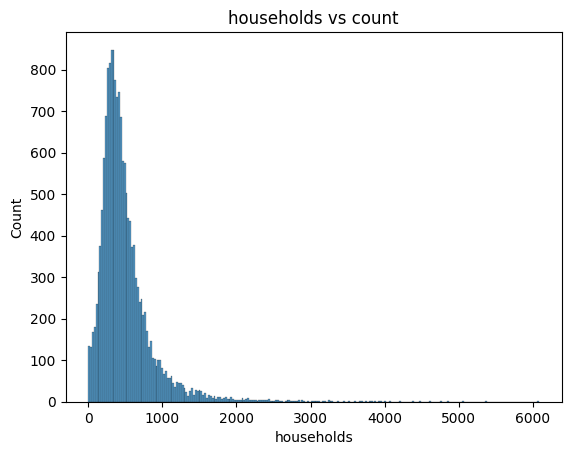

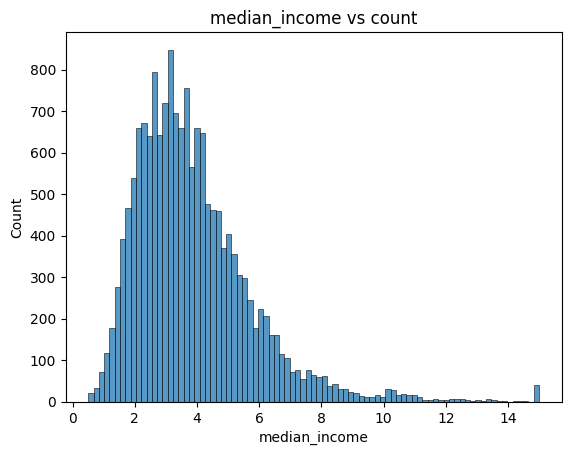

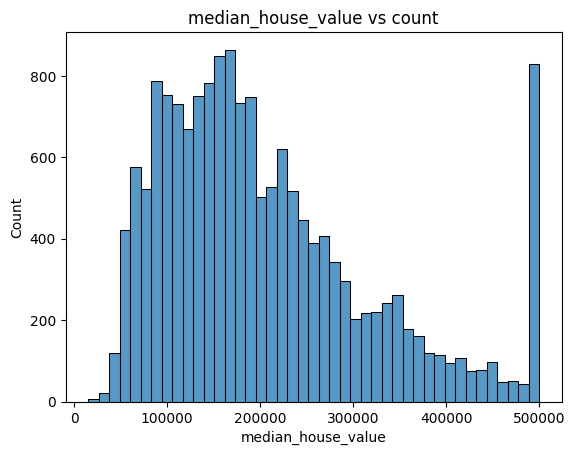

In [17]:
## distribution of data 

for col in all_numeric_col:
    plt.title(f'{col} vs count')
    plt.xlabel(col)
    plt.ylabel('Count')
    sns.histplot(x=df_train_new[col])
    plt.show()
    print('==='*10)

## columns to log or power law disribution

1.total bedrooms

2.total rooms

3.households

4.papulatios

In [18]:
##fild the skewness of data using pandas
df_train_new.skew()

longitude            -0.289892
latitude              0.454353
housing_median_age    0.060980
total_rooms           4.143435
total_bedrooms        3.459121
population            5.329808
households            3.409757
median_income         1.634339
median_house_value    0.979674
dtype: float64

In [19]:
## analize the cat features 
all_cat_columns=[ col for col in df_train_new.columns if df_train_new[col].dtypes=='O' and 'C']

In [20]:
all_cat_columns

['ocean_proximity']

In [21]:
all_dicreate_col_nunique=[(col,df_train_new[col].nunique()) for col in all_cat_columns]

In [22]:
all_dicreate_col_nunique

[('ocean_proximity', 5)]

In [31]:
grp_by=df_train_new.groupby(all_dicreate_col_nunique[0][0])[target_col_name]

In [32]:
all_medin_val=[np.median(grp[1]) for grp in grp_by]

In [33]:
df_train_new.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.94,34.06,32.0,3418.0,662.0,2003.0,622.0,4.0333,210200.0,<1H OCEAN


In [34]:
all_medin_val

[214100.0, 108200.0, 432350.0, 235600.0, 228200.0]

<AxesSubplot:>

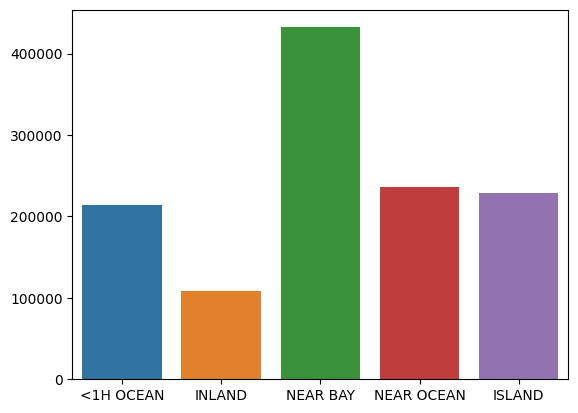

In [35]:
### bar plot median vs grp
sns.barplot(y=all_medin_val,x=df_train_new[all_dicreate_col_nunique[0][0]].unique())

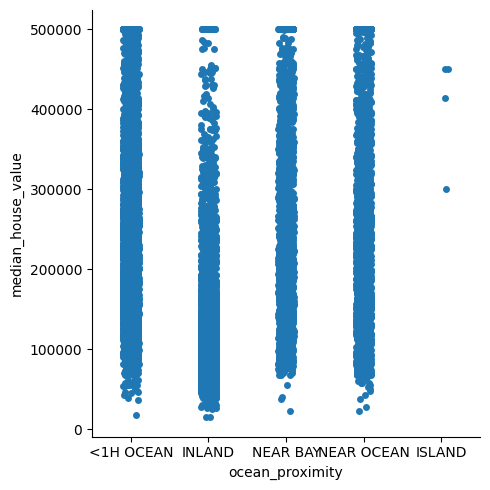

In [43]:
## count the cat features

sns.catplot(x=df_train_new[all_dicreate_col_nunique[0][0]],y=df_train_new[target_col_name])


In [52]:
list(ocean_proxity_value_counts.values)

[7263, 5235, 2130, 1880, 4]

<AxesSubplot:>

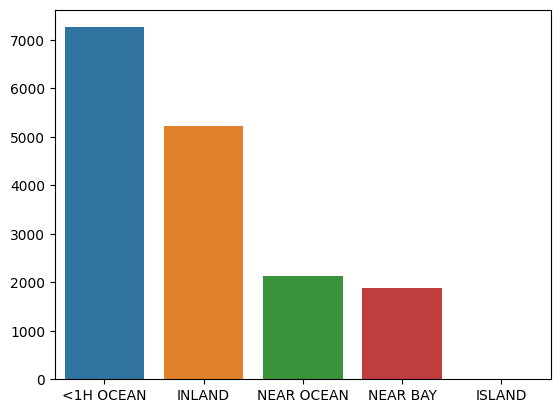

In [53]:
### count the ocean_proxity unique values
ocean_proxity_value_counts=df_train_new[all_dicreate_col_nunique[0][0]].value_counts()
sns.barplot(x=ocean_proxity_value_counts.index,y=list(ocean_proxity_value_counts.values))

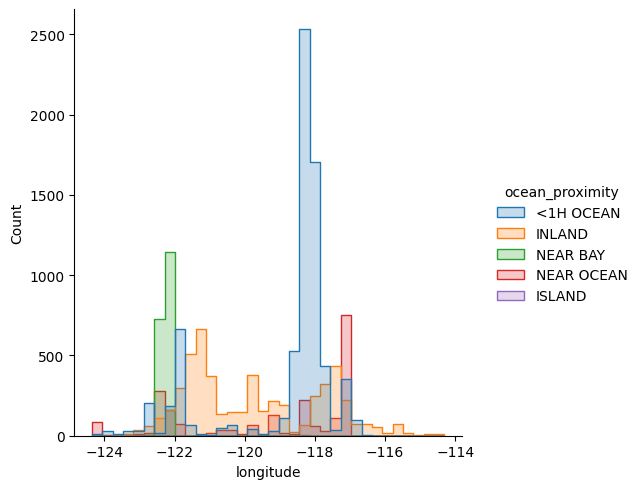

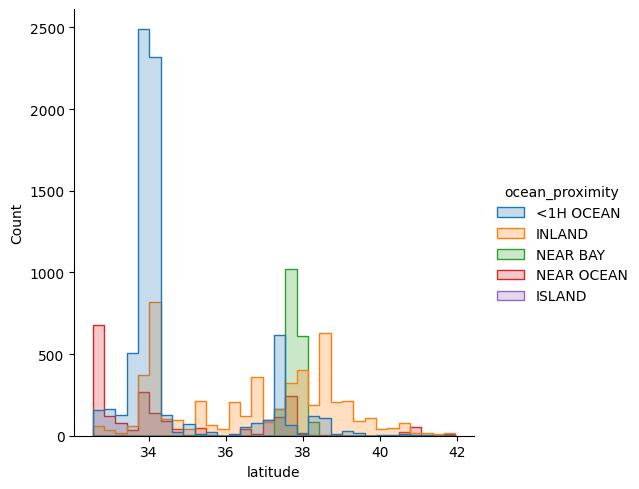

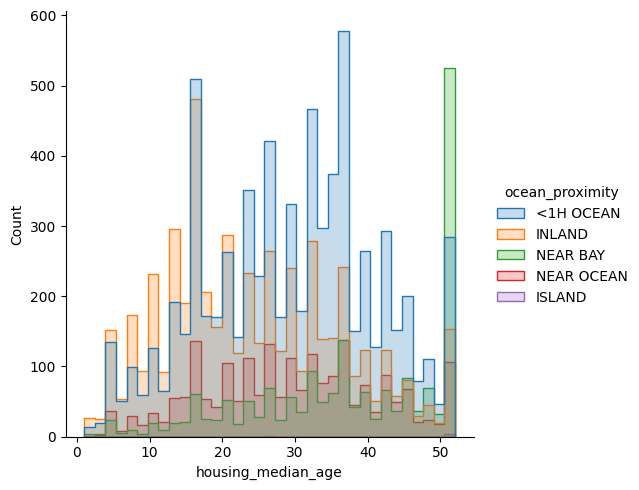

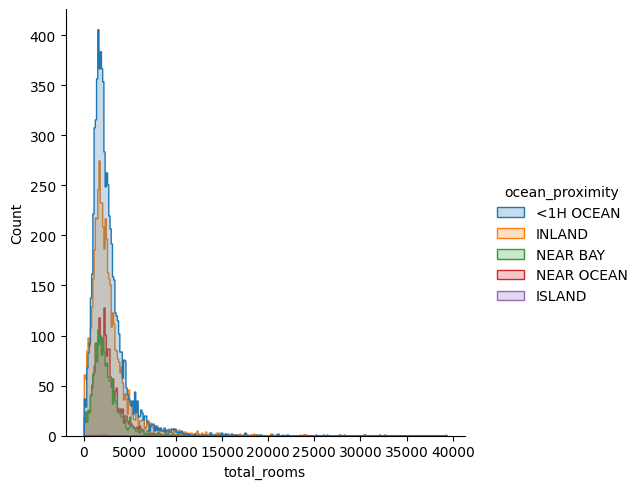

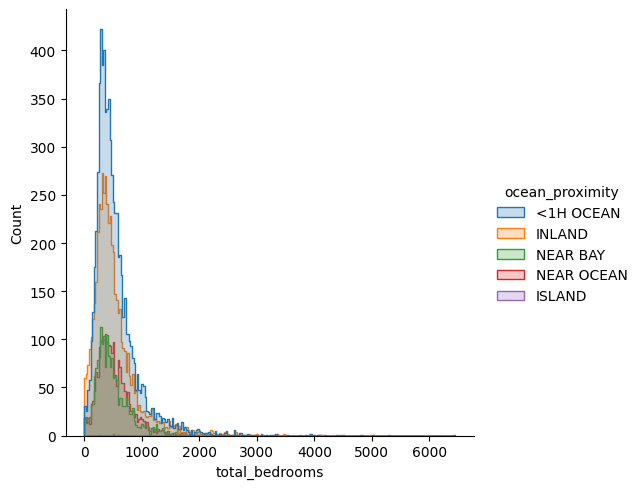

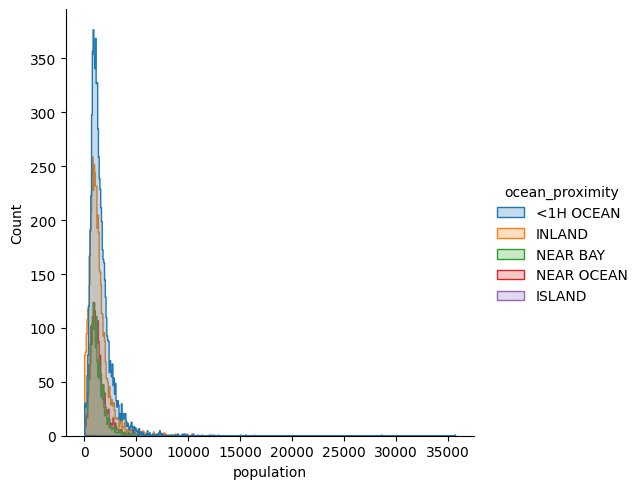

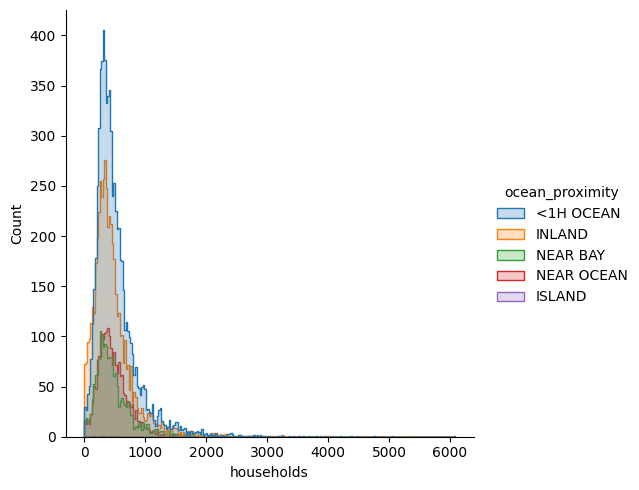

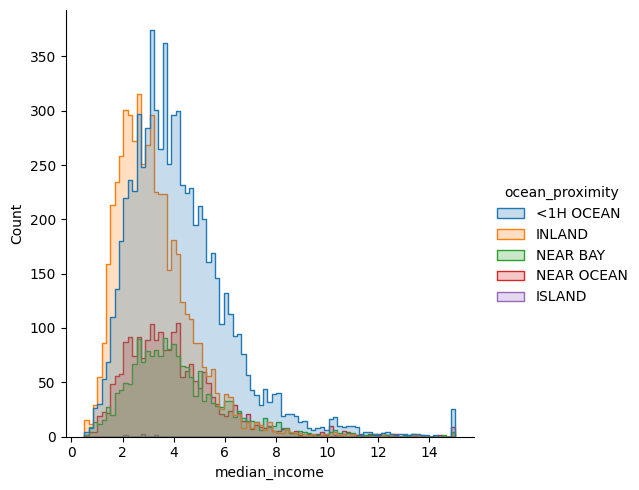

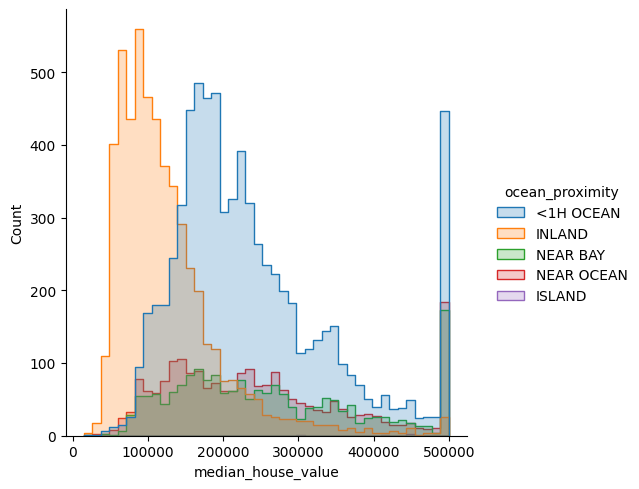

In [56]:
### distribution plot
for col in all_numeric_col: 
    sns.displot(x=df_train_new[col], hue=df_train_new.ocean_proximity, element="step")
    plt.show()

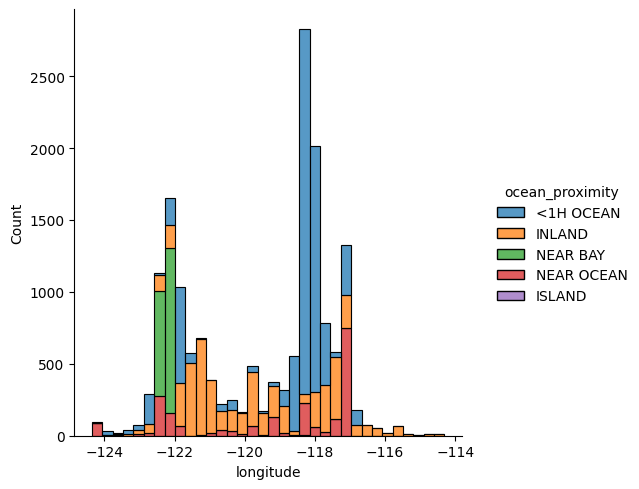

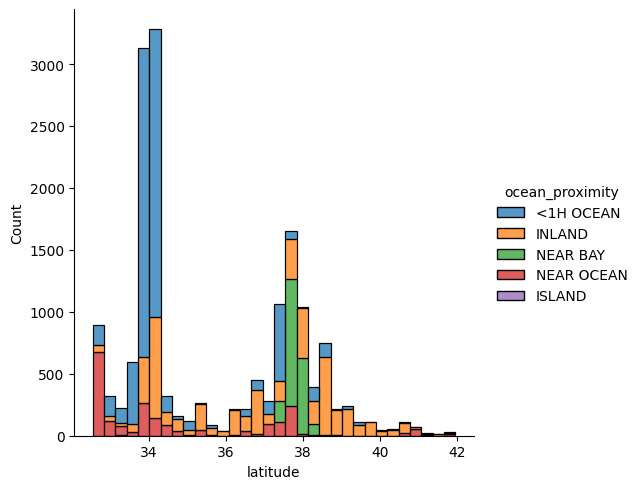

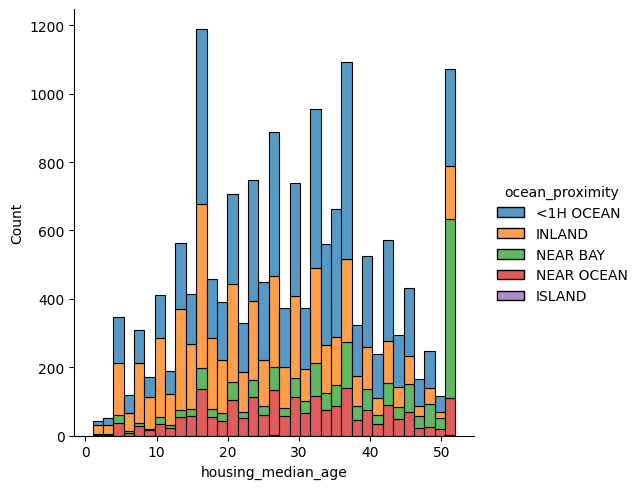

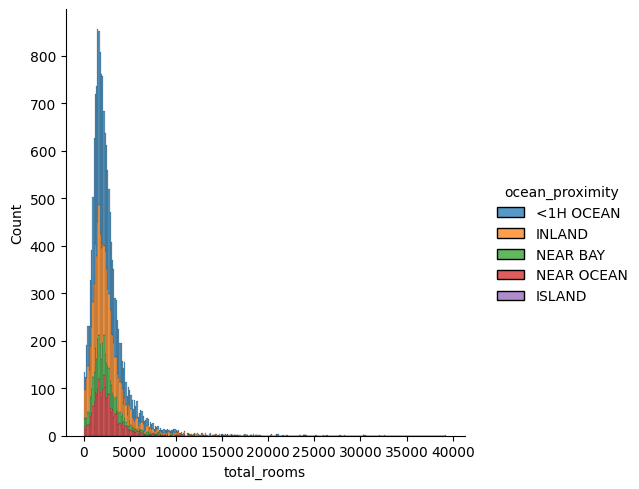

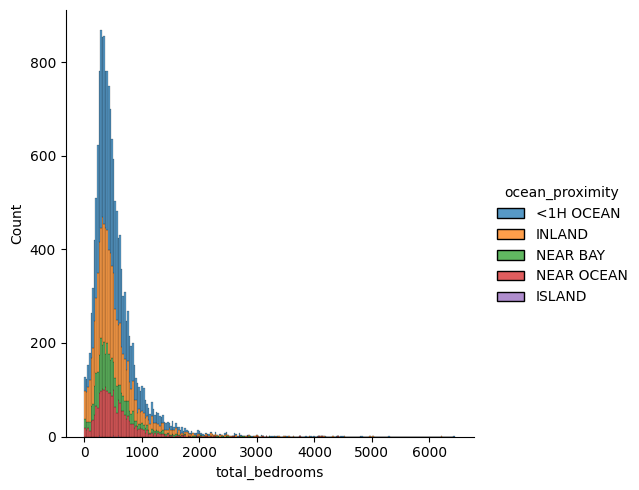

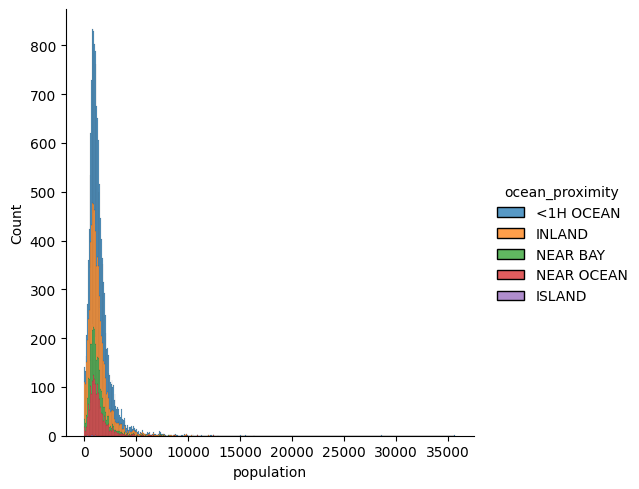

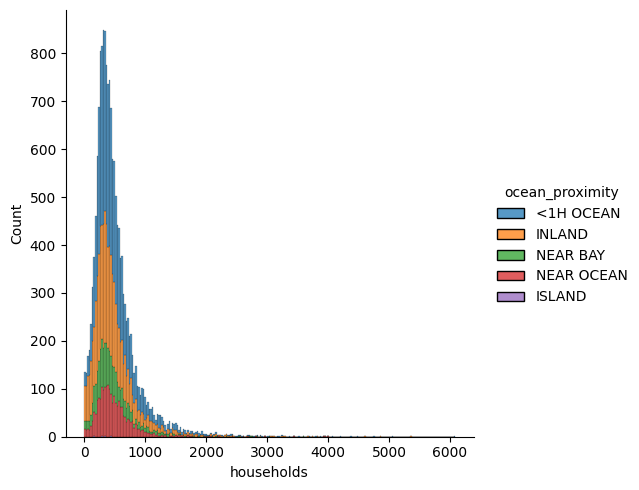

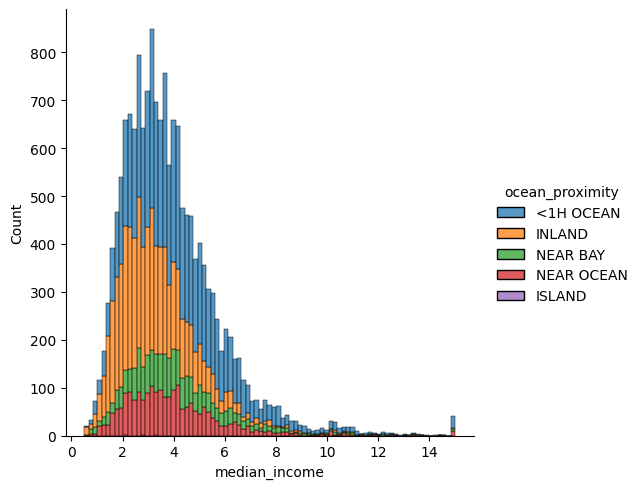

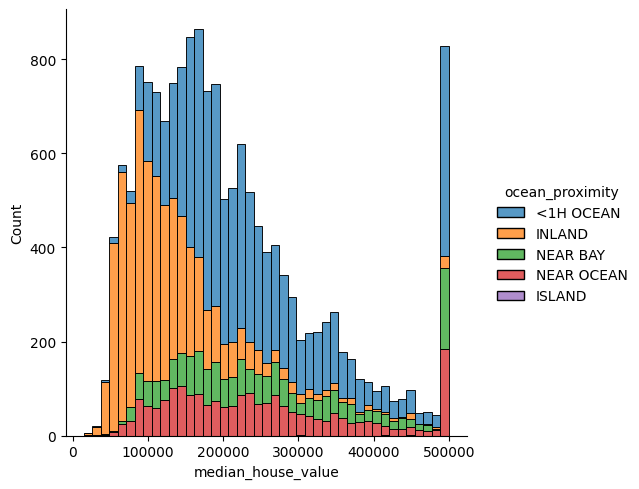

In [57]:
### distribution plot
for col in all_numeric_col: 
    sns.displot(x=df_train_new[col], hue=df_train_new.ocean_proximity, multiple="stack")
    plt.show()

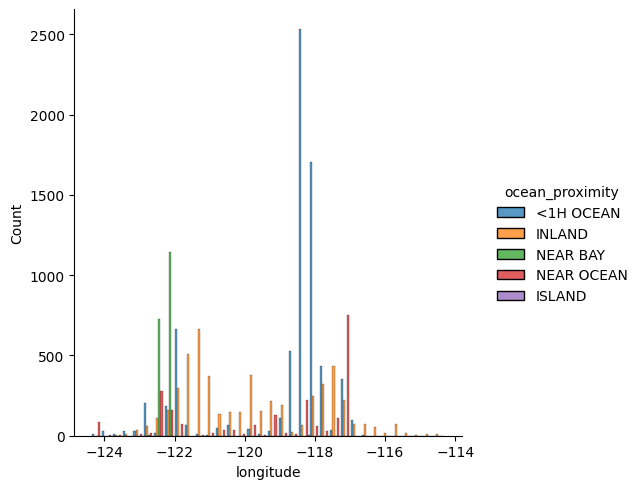

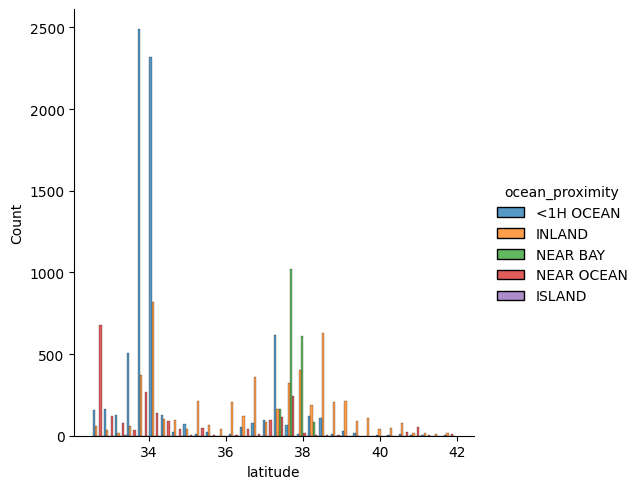

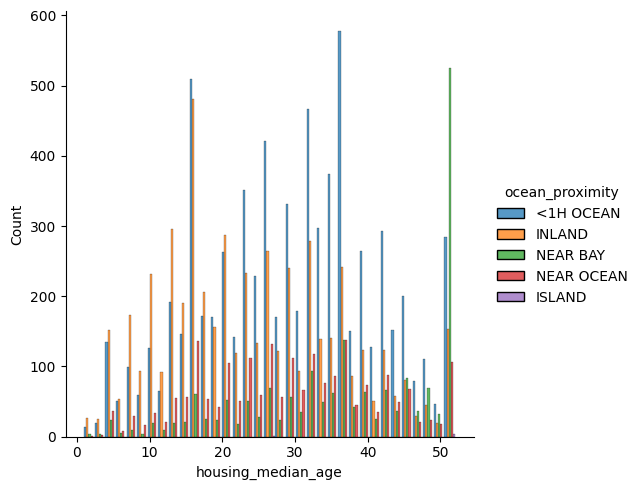

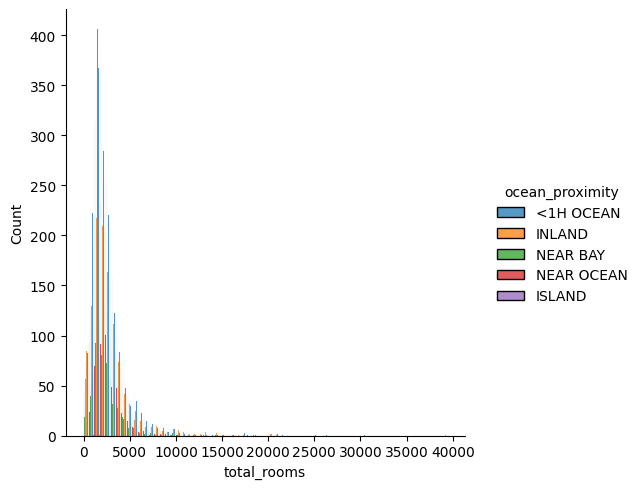

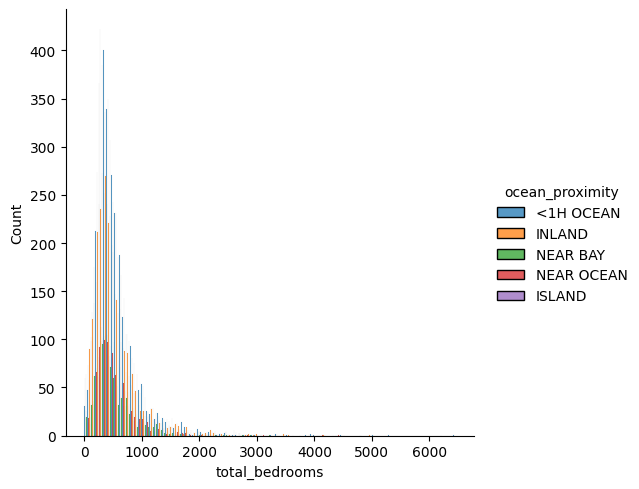

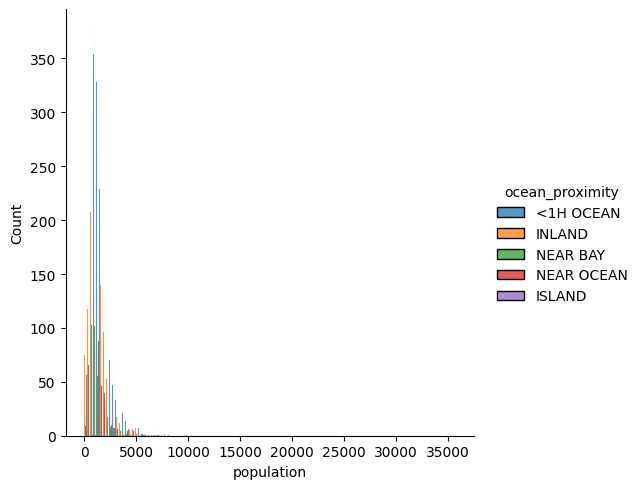

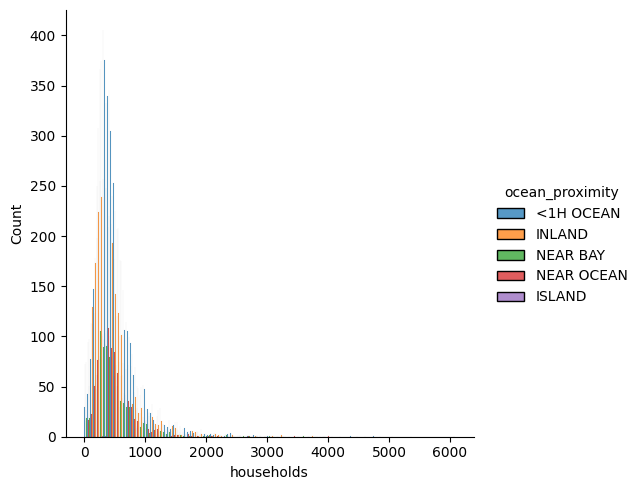

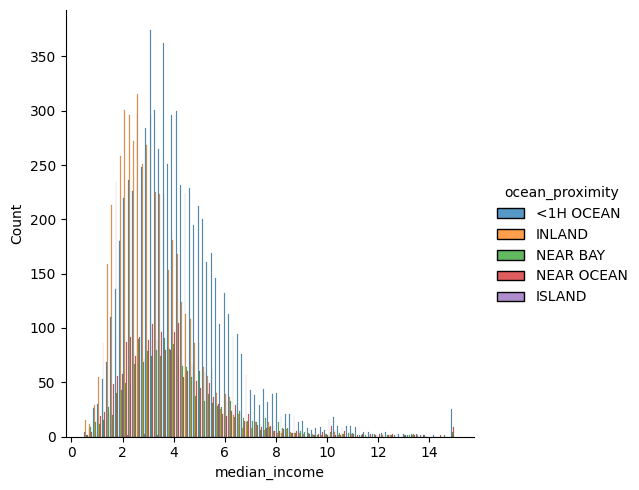

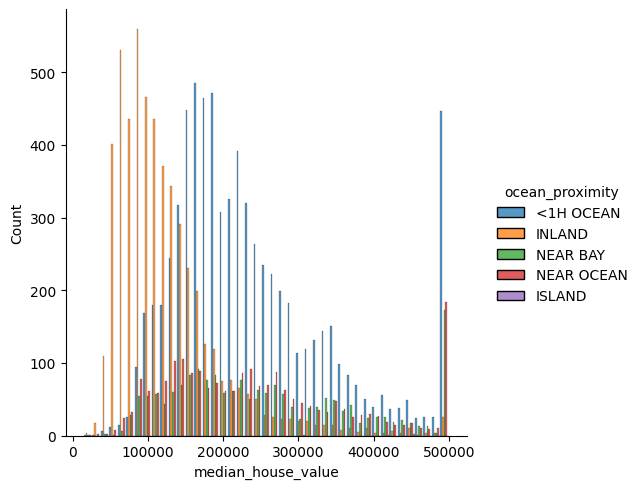

In [58]:
### distribution plot
for col in all_numeric_col: 
    sns.displot(x=df_train_new[col], hue=df_train_new.ocean_proximity,multiple="dodge")
    plt.show()

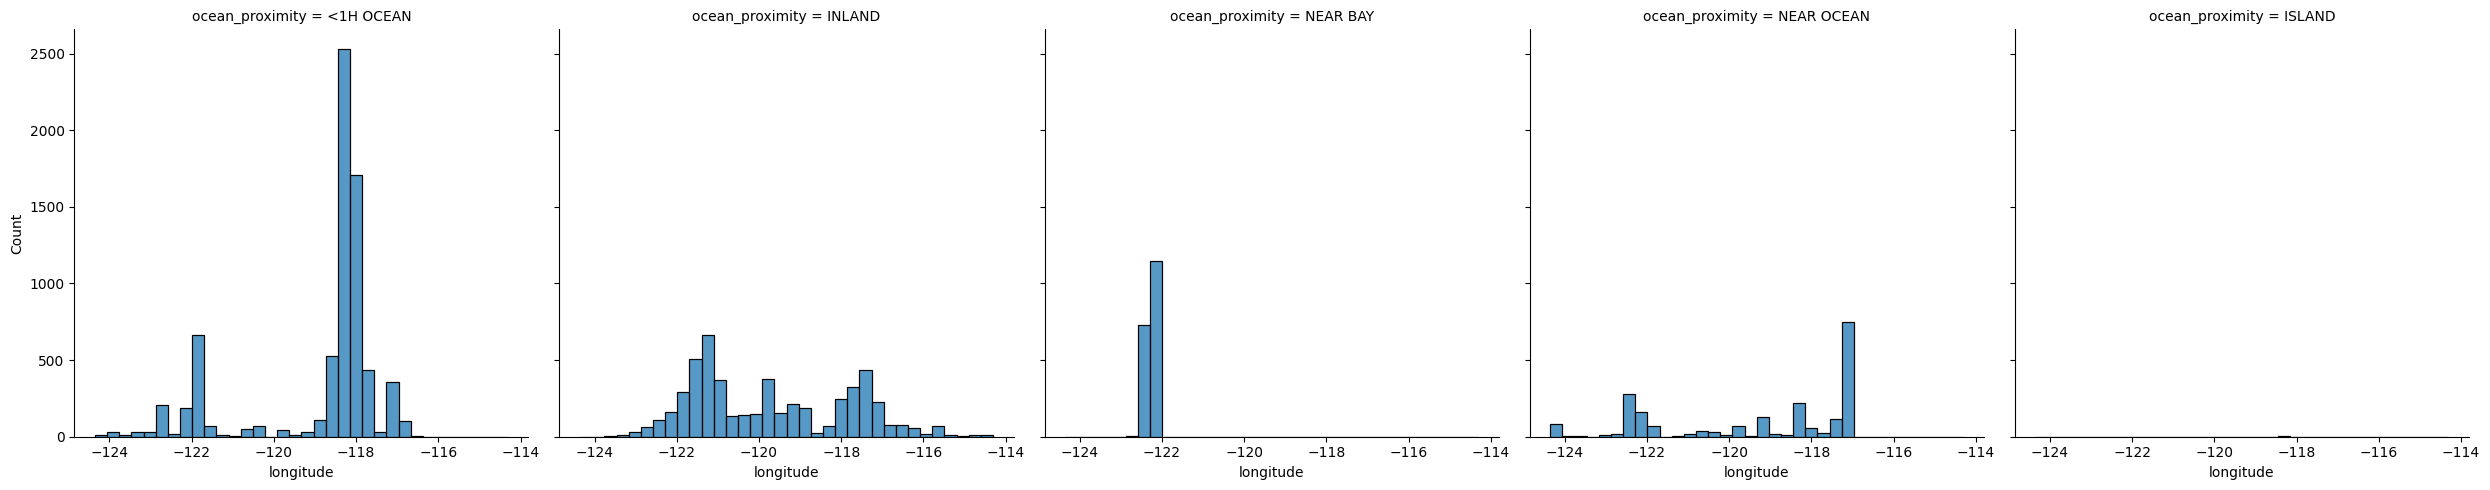

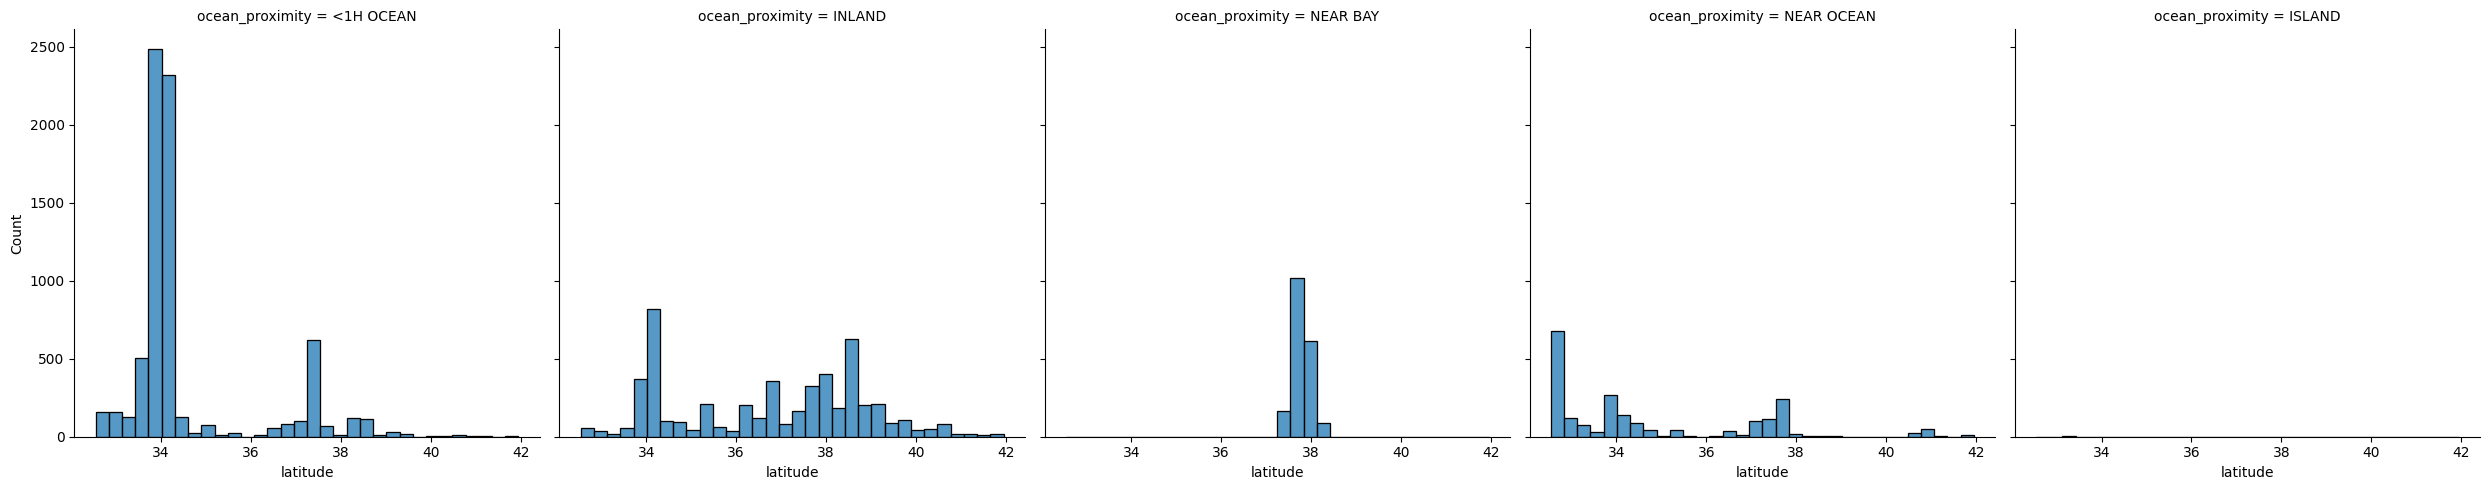

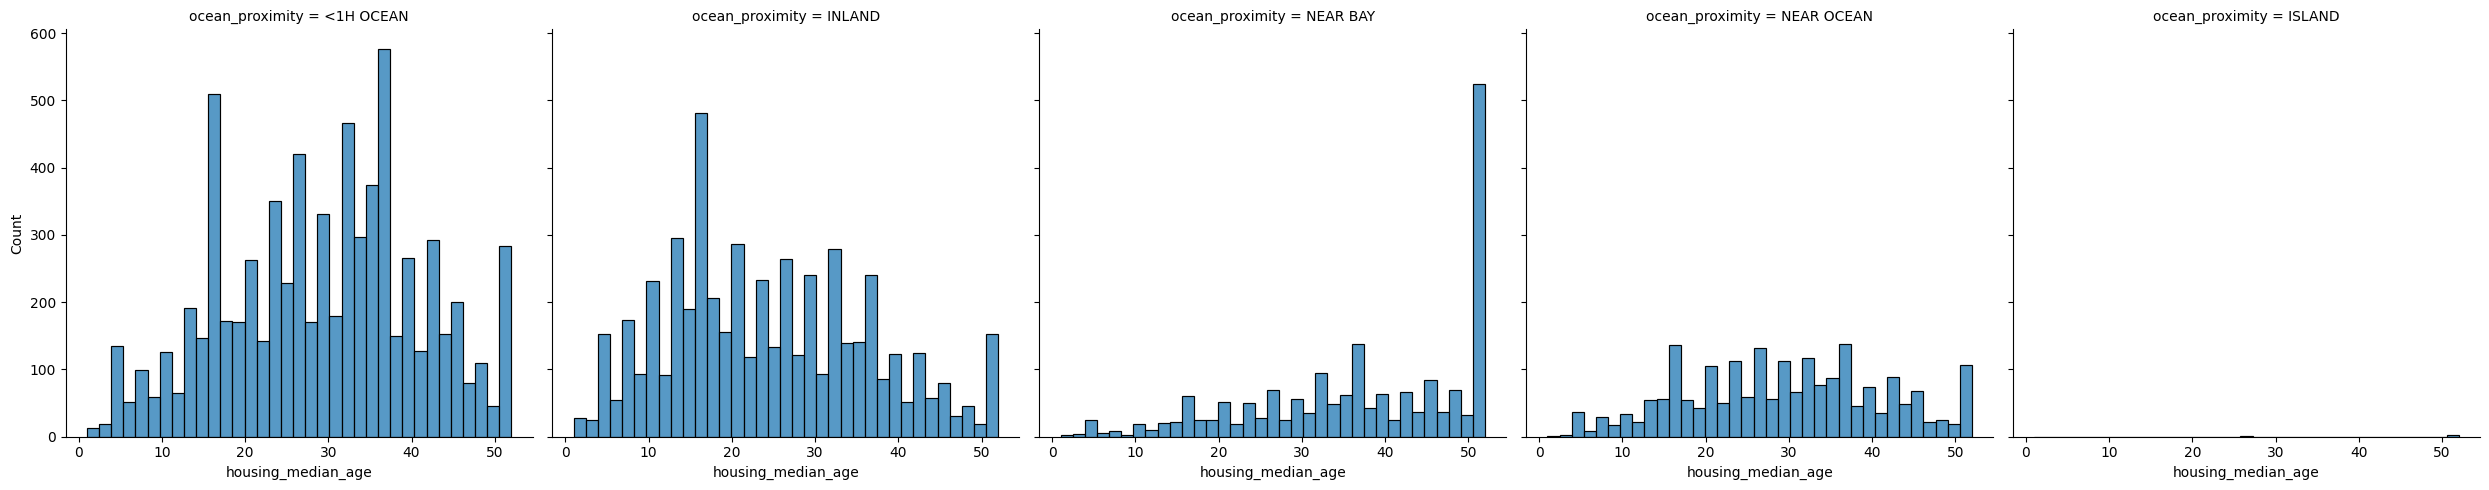

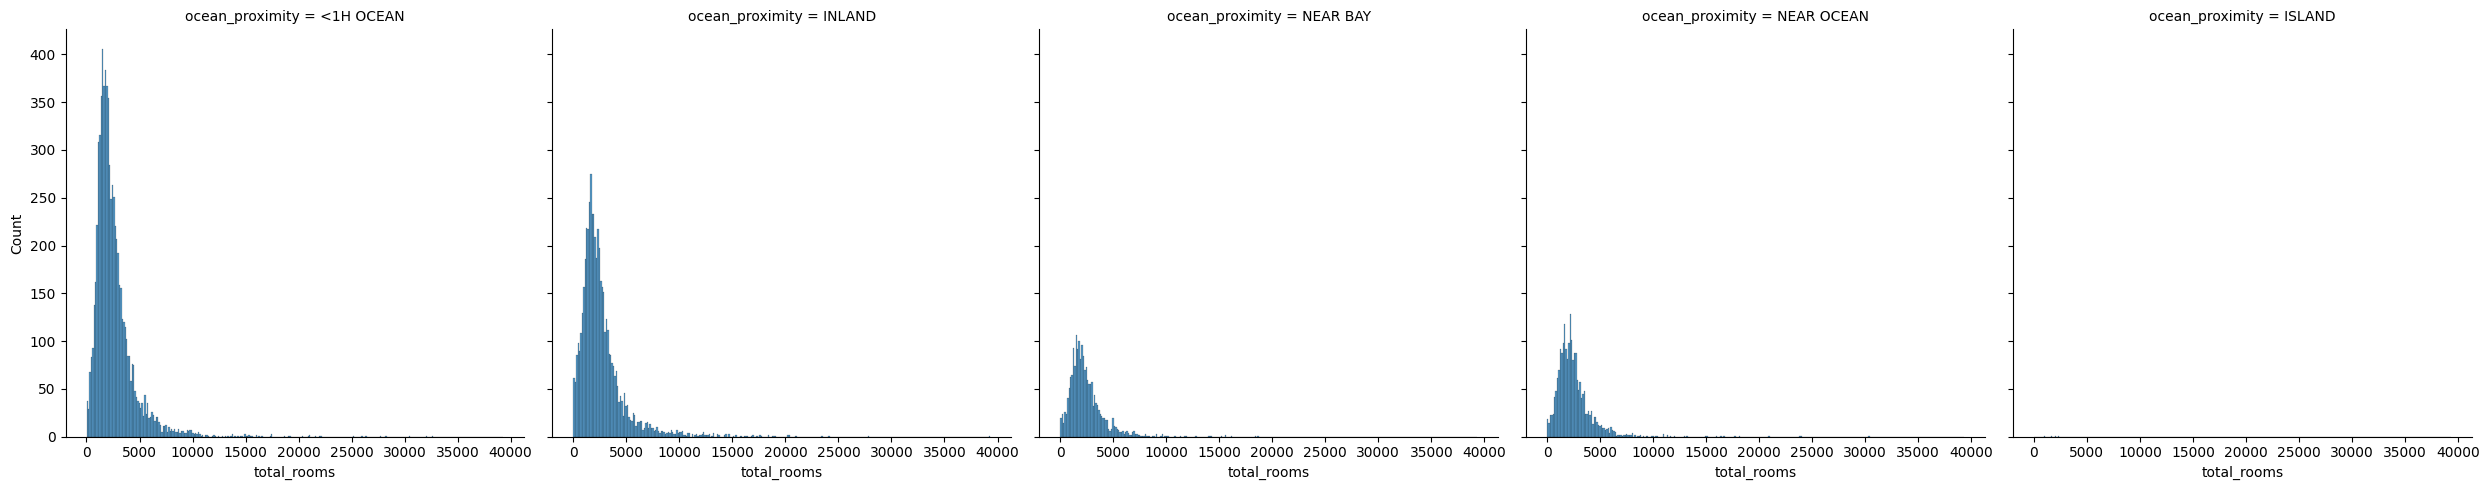

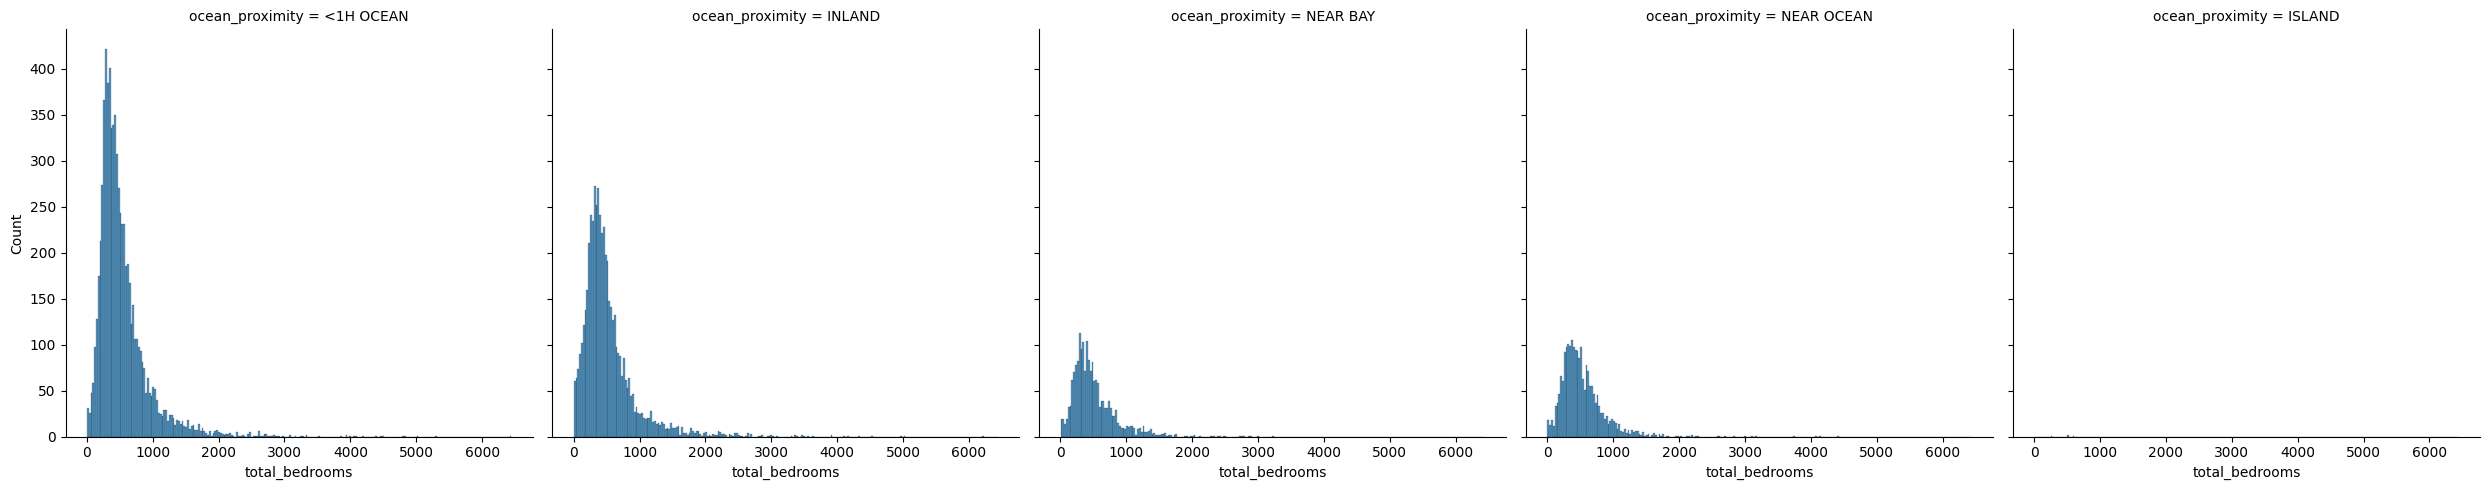

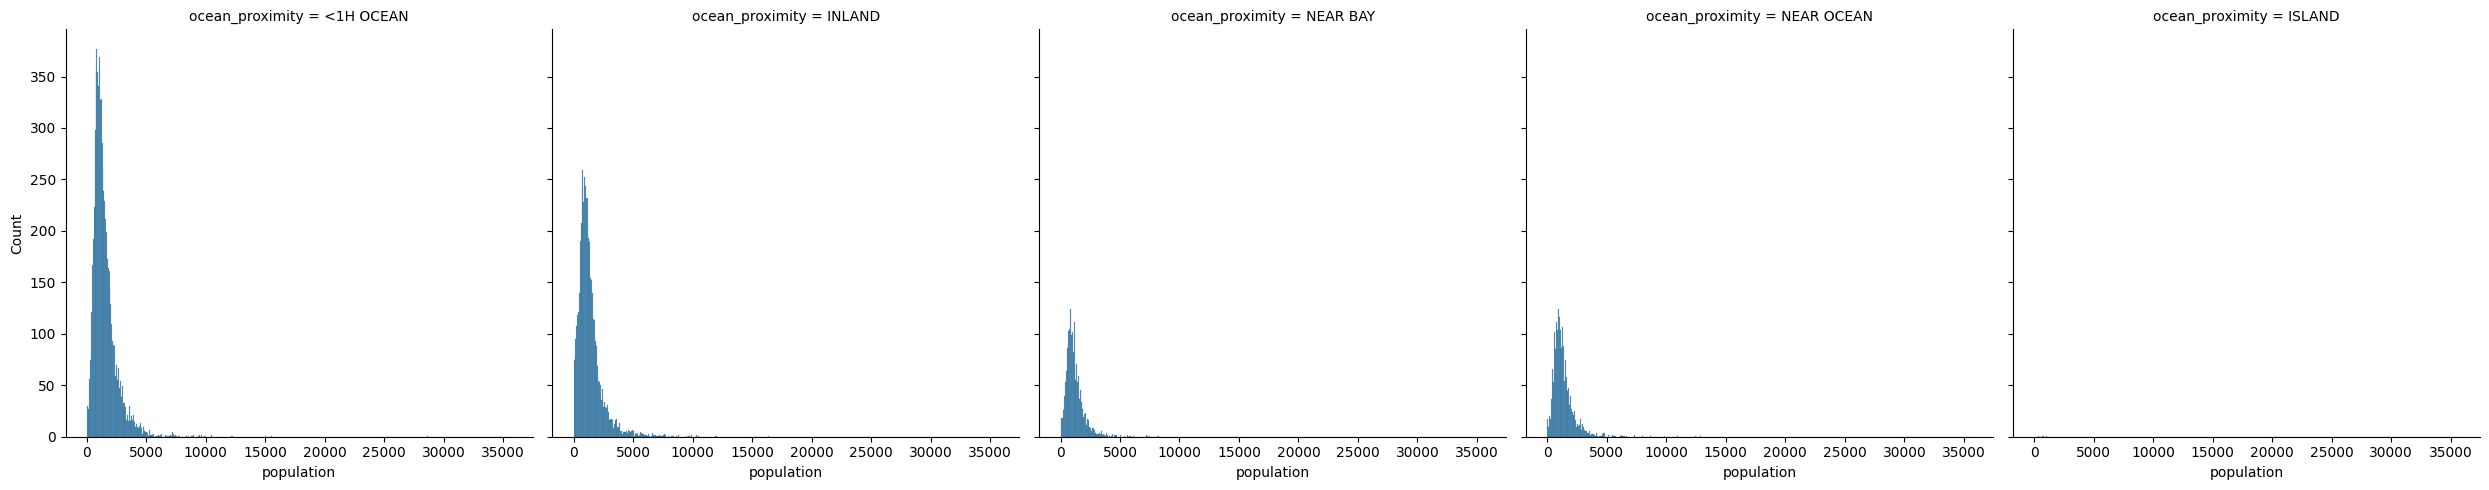

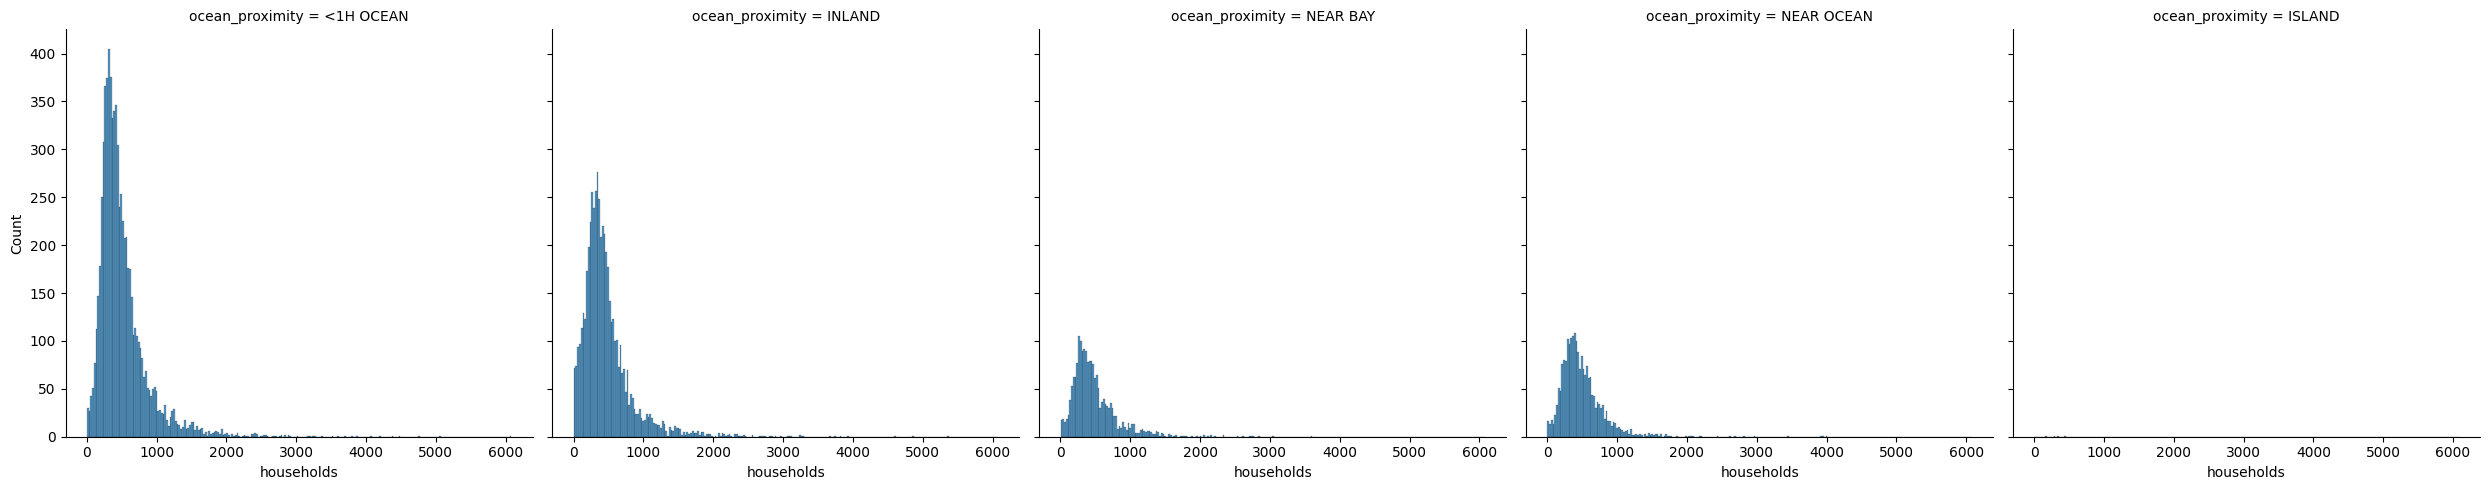

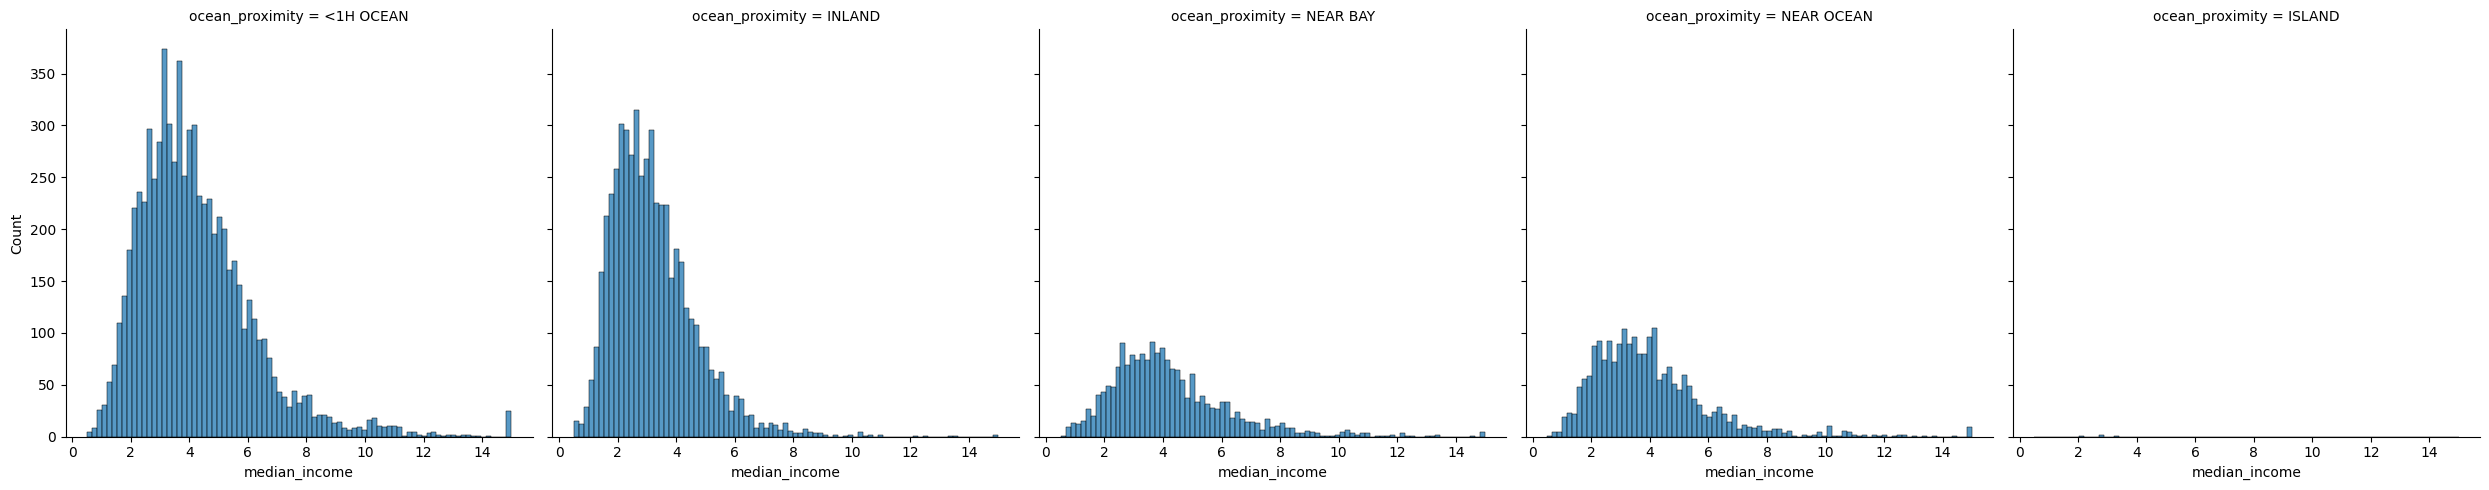

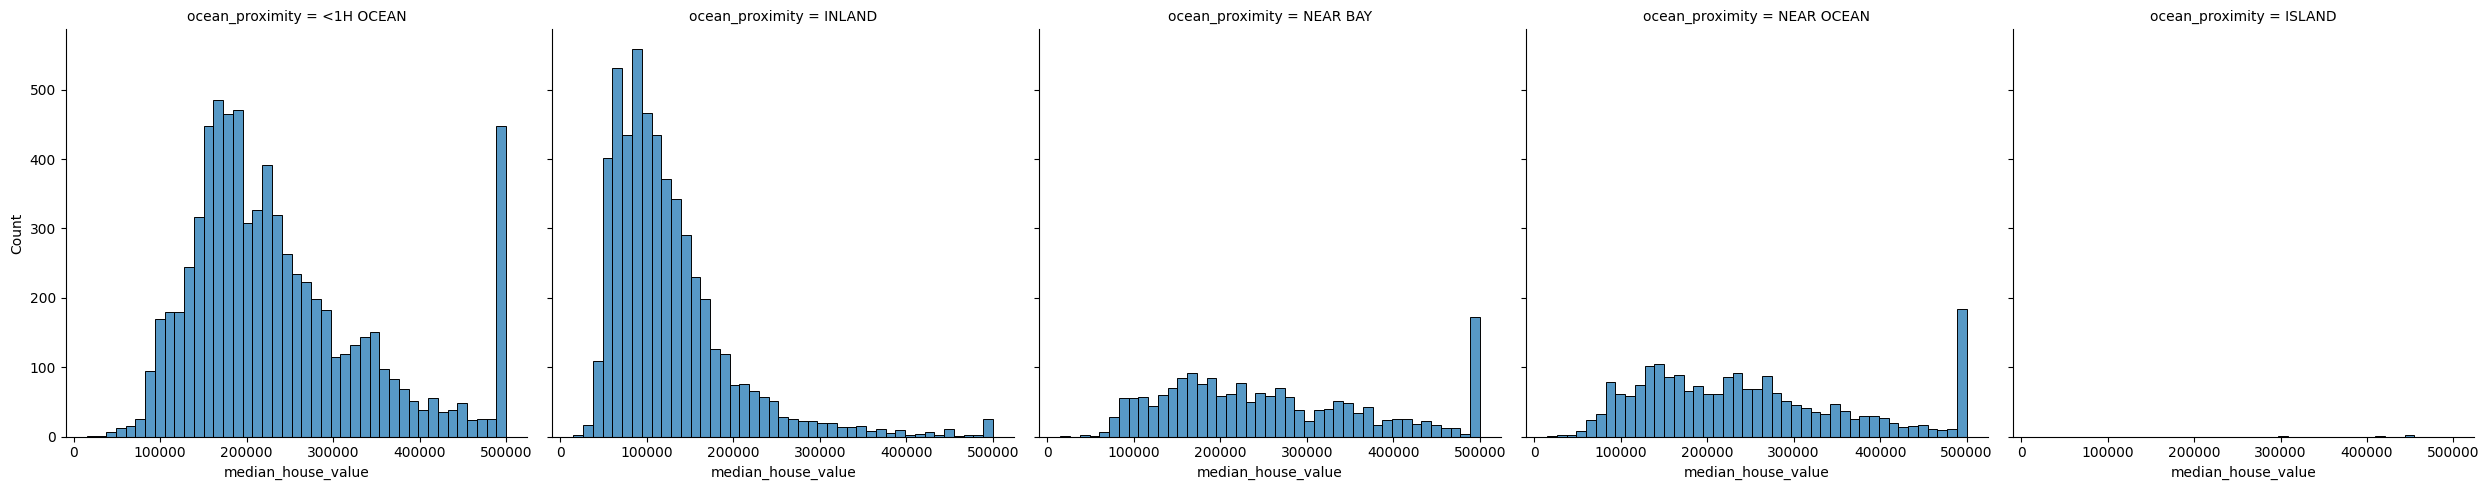

In [60]:
for col in all_numeric_col:
    sns.displot(df_train_new, x=col, col='ocean_proximity')
    plt.show()

In [61]:
## find the corr usmg pandas
df_train_new.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924813,-0.112181,0.041595,0.066195,0.095999,0.051299,-0.017589,-0.047002
latitude,-0.924813,1.000000,0.015885,-0.034782,-0.064836,-0.107615,-0.068920,-0.077980,-0.142754
housing_median_age,-0.112181,0.015885,1.000000,-0.361966,-0.322119,-0.294555,-0.303605,-0.121615,0.105336
total_rooms,0.041595,-0.034782,-0.361966,1.000000,0.931512,0.855382,0.918283,0.198879,0.133785
total_bedrooms,0.066195,-0.064836,-0.322119,0.931512,1.000000,0.877311,0.978706,-0.007183,0.048016
population,0.095999,-0.107615,-0.294555,0.855382,0.877311,1.000000,0.907817,0.004596,-0.025355
households,0.051299,-0.068920,-0.303605,0.918283,0.978706,0.907817,1.000000,0.013752,0.065036
median_income,-0.017589,-0.077980,-0.121615,0.198879,-0.007183,0.004596,0.013752,1.000000,0.688214
median_house_value,-0.047002,-0.142754,0.105336,0.133785,0.048016,-0.025355,0.065036,0.688214,1.000000


<AxesSubplot:>

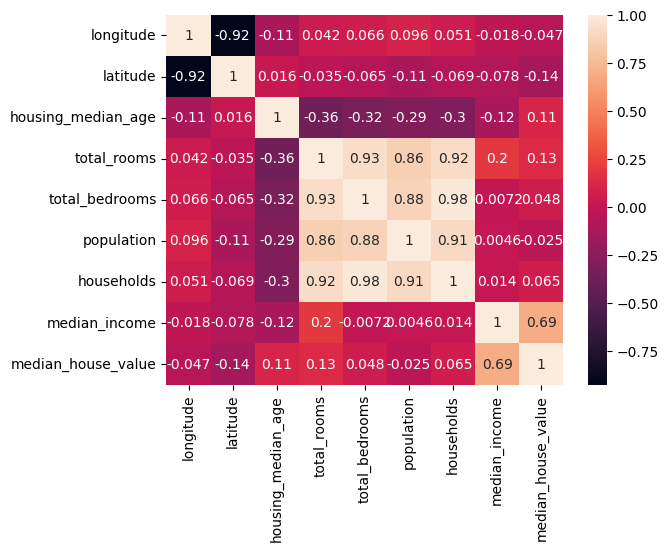

In [62]:
## visulaizing the corr using heatmap
sns.heatmap(df_train_new.corr(),annot=True)

In [ ]:
## find the multicolinearity
all_multi_colinearity_col=[for col in df_train_new.columns[:-2] for col_1 in df_train_new.columns[:-2] if df_train_new.loc[:,[col,col_1]].corr() ]

In [81]:
def check_multi_colinearity(df:pd.DataFrame,thersold:float=0.90)->dict:
    final_dic={}
    for col_1 in df:
        for col_2 in df:
            if col_1!=col_2:
                corr=df_train_new.loc[:,[col_1,col_2]].corr().iloc[0,1]
                if f'{col_1} vs {col_2}' and f'{col_2} vs {col_1}' not in final_dic:
                    final_dic.update({ f'{col_1} vs {col_2}':corr }) if corr>thersold else ''
    return final_dic

In [83]:
### most corr independent features
all_multi_colin_features_dic=check_multi_colinearity(df_train_new.iloc[:,:-2])

In [86]:
all_multi_colin_features_dic.values()

dict_values([0.9315119478583019, 0.918282919030431, 0.9787057466267675, 0.9078172713878976])

<AxesSubplot:>

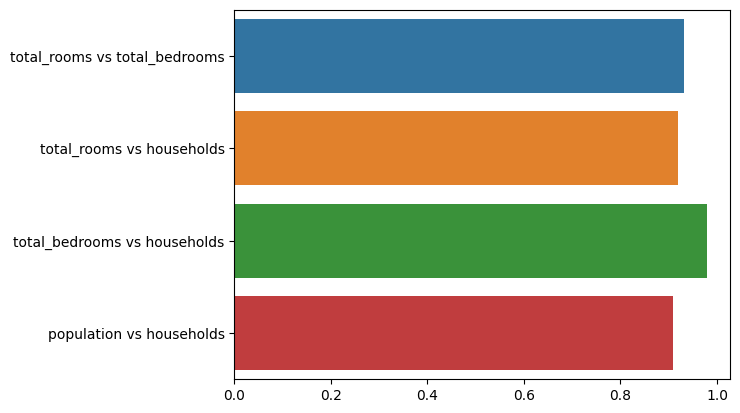

In [93]:
## plot the multi colinearity features
sns.barplot(y=list(all_multi_colin_features_dic.keys()), x=list(all_multi_colin_features_dic.values()),orient='horizontal')

In [ ]:
# to find the  corr all  columns vs output col
[for col in df_train_new]

In [ ]:
df_train_new.head()